In [3]:
import pandas as pd 

# Exercício 1

Considere a base de dados disponível em

https://raw.githubusercontent.com/Lan-Yang/Extract-Association-Rules/master/data/NYC_Causes_of_Death.csv. Essa base de dados lista causas de morte na cidade de Nova York, bem como a etnia e o sexo dessas pessoas. Execute o algoritmo de regras de associação Apriori com os parâmetros min_support=0.005, min_confidence=0.35, min_lift=1.5, min_length=2. O itemset que gerou o maior número de regras é o

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Lan-Yang/Extract-Association-Rules/master/data/NYC_Causes_of_Death.csv")
df.head(2)

,non-hispanic black,male,human immunodeficiency virus disease
0,non-hispanic black,male,human immunodeficiency virus disease
1,non-hispanic black,male,human immunodeficiency virus disease


In [7]:
from apyori import apriori,  load_transactions

TypeError: 'numpy.ndarray' object is not callable

In [16]:
association_rules = list(apriori(df.values, min_support=0.005, min_confidence=0.35, min_lift=1.5, min_length=2))

In [31]:
import numpy as np

In [39]:
higher = np.array([len(rule.ordered_statistics) for rule in association_rules]).argmax()
association_rules[higher].items

frozenset({'assault (homicide)', 'male', 'non-hispanic black'})

# 2

In [52]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/moons.csv')
df.head(2)

,X,Y
0,-0.415208,1.035735
1,0.058781,0.304334


In [48]:
models = {
    'kmeans' : KMeans(n_clusters=4),
    'dbscan' : DBSCAN(eps=0.4),
    'gmm' : GaussianMixture(n_components=4)
}


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


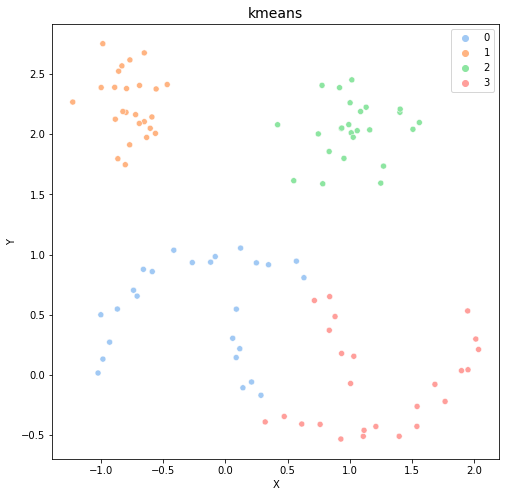

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


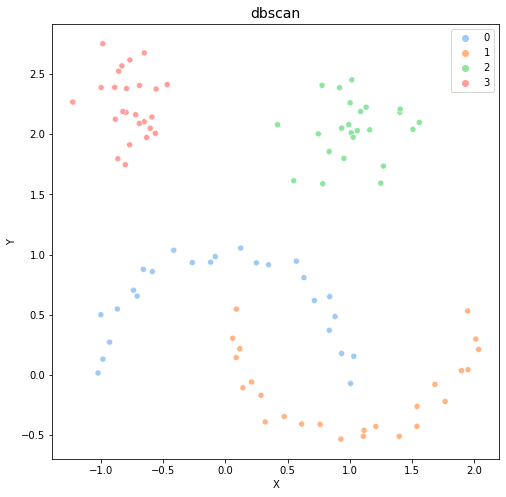

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


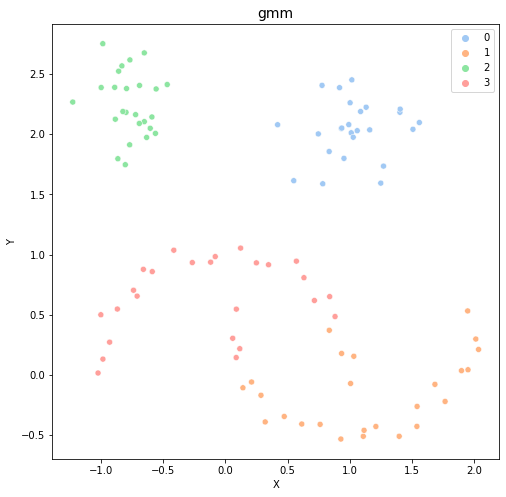

In [59]:
for model in models.keys():
    plt.figure(figsize=(8,8))
    plt.title(model,fontsize=14)
    sns.scatterplot(df['X'],df['Y'],hue=models[model].fit_predict(df.values),palette='pastel')
    plt.show()


# 3

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/benjaminwilson/python-hierarchical-clustering-exercises/master/datasets/seeds-less-rows.csv")
df.head(2)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat


In [61]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [84]:
ag = AgglomerativeClustering(linkage = 'single')
#‘ward’, ‘complete’, ‘average’, ‘single’
ag.fit_predict(pd.get_dummies(df,drop_first=True))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [80]:
ag.fit_predict()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

# 4

Considere a base de dados disponível em https://www.openml.org/d/1489. Aplique o método de pré-processamento StandardScaler, que transforma os atributos para média zero e desvio padrão 1. Execute o k-means com o número de clusters variando de 2 a 9. O número adequado de clusters, de acordo com o gráfico de inertia versus o número de clusters é Resposta

In [89]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
#data = fetch_openml(data_id="1489")
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(data.data),columns=data.data.columns)
df.head(2)

,V1,V2,V3,V4,V5
0,0.489972,-0.451570,-1.048087,-0.598748,-0.020420
1,-0.641324,0.109255,0.292157,-0.916889,0.240245


In [91]:
inertias = []
for cluster in range(2,10):
    model = KMeans(n_clusters=cluster)
    model.fit(df.values)
    inertias.append(model.inertia_)

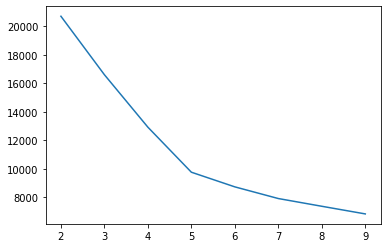

In [98]:
plt.plot(range(2,10),inertias)
plt.show()